In [5]:
import pandas as pd
import sqlite3

In [6]:
inventory_df = pd.read_csv('blinkit_inventoryNew.csv')
order_items_df = pd.read_csv('blinkit_order_items.csv')
orders_df = pd.read_csv('blinkit_orders (1).csv')
products_df = pd.read_csv('blinkit_products (1).csv')

In [7]:
def rsql (query) :
    return pd.read_sql_query(query,conn)


In [8]:
# create a connection to database
conn=sqlite3.connect ('blinkit.db')
# create a cursor
c=conn.cursor ()

Create Tables (3NF)

In [9]:
c.execute("DROP TABLE IF EXISTS Products")
c.execute("DROP TABLE IF EXISTS Inventory")
c.execute("DROP TABLE IF EXISTS Orders")
c.execute("DROP TABLE IF EXISTS Order_Items")

In [10]:
c.execute('''CREATE TABLE Products (
    product_id INTEGER PRIMARY KEY,
    product_name TEXT,
    category TEXT,
    brand TEXT,
    price REAL,
    mrp REAL,
    margin_percentage REAL,
    shelf_life_days INTEGER,
    min_stock_level INTEGER,
    max_stock_level INTEGER
)''')

In [11]:
c.execute('''CREATE TABLE Inventory (
    inventory_id INTEGER PRIMARY KEY AUTOINCREMENT,
    product_id INTEGER,
    date TEXT,
    stock_received INTEGER,
    damaged_stock INTEGER,
    FOREIGN KEY (product_id) REFERENCES Products(product_id)
)''')

In [12]:
c.execute('''CREATE TABLE Orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    order_date TEXT,
    promised_delivery_time TEXT,
    actual_delivery_time TEXT,
    delivery_status TEXT,
    order_total REAL,
    payment_method TEXT,
    delivery_partner_id INTEGER,
    store_id INTEGER
)''')

In [13]:
c.execute('''CREATE TABLE Order_Items (
    order_item_id INTEGER PRIMARY KEY AUTOINCREMENT,
    order_id INTEGER,
    product_id INTEGER,
    quantity INTEGER,
    unit_price REAL,
    FOREIGN KEY (order_id) REFERENCES Orders(order_id),
    FOREIGN KEY (product_id) REFERENCES Products(product_id)
)''')

In [14]:
products_df.to_sql('Products', conn, if_exists='append', index=False)
inventory_df.to_sql('Inventory', conn, if_exists='append', index=False)
orders_df.to_sql('Orders', conn, if_exists='append', index=False)
order_items_df.to_sql('Order_Items', conn, if_exists='append', index=False)

conn.commit()

ERD

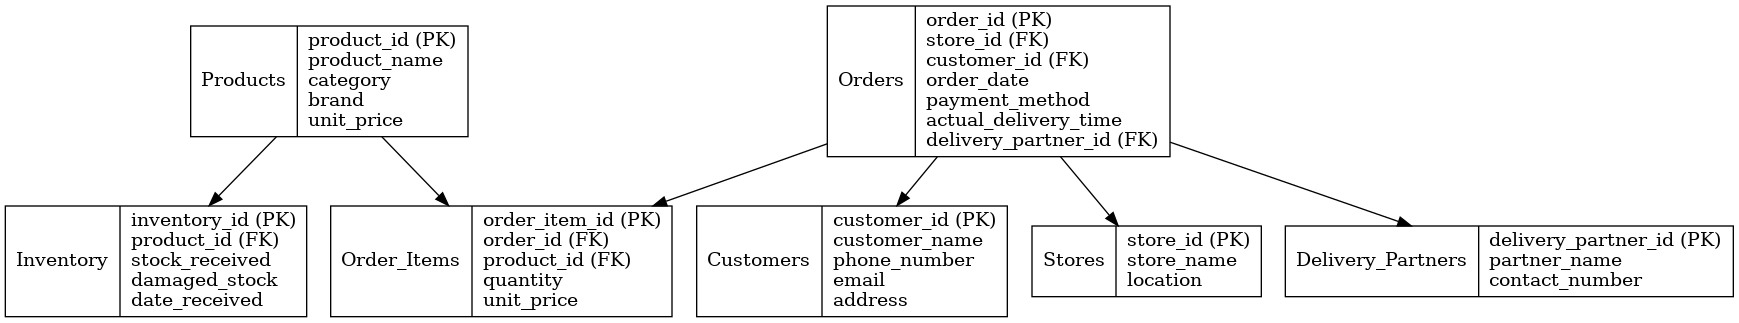

In [15]:
from IPython.display import Image, display
display(Image(filename='quick_commerce_erd.png')) 

Task 3: JOIN Queries - 7 Problem Statements

In [16]:
def rsql(query):
    	return pd.read_sql_query(query, conn)


 List all product names along with their category and brand

In [17]:

rsql('''
SELECT product_name, category, brand
FROM Products
ORDER BY category, product_name
''')

,product_name,category,brand
0,Baby Food,Baby Care,Kashyap-Reddy
1,Baby Food,Baby Care,Karnik PLC
2,Baby Food,Baby Care,Srinivas PLC
3,Baby Food,Baby Care,Mallick PLC
4,Baby Food,Baby Care,"Garg, Saraf and Dutta"
...,...,...,...
263,Popcorn,Snacks & Munchies,Golla-Luthra
264,Popcorn,Snacks & Munchies,Gulati-Tandon
265,Popcorn,Snacks & Munchies,"Chanda, Som and Vohra"
266,Popcorn,Snacks & Munchies,"Chaudhari, Pant and Singh"


Calculate the average unit price of products in each category

In [18]:
rsql('''
SELECT category, ROUND(AVG(unit_price), 2) AS avg_price
FROM Order_Items oi
JOIN Products p ON oi.product_id = p.product_id
GROUP BY category
ORDER BY avg_price DESC
''')

,category,avg_price
0,Pharmacy,601.52
1,Dairy & Breakfast,574.78
2,Fruits & Vegetables,566.48
3,Pet Care,535.21
4,Baby Care,521.66
5,Cold Drinks & Juices,517.33
6,Personal Care,438.95
7,Snacks & Munchies,417.27
8,Instant & Frozen Food,413.00
9,Household Care,409.00


 List all orders with their product names and quantities

In [19]:
rsql( '''
SELECT o.order_id, o.order_date, p.product_name, oi.quantity
FROM Orders o
JOIN Order_Items oi ON o.order_id = oi.order_id
JOIN Products p ON oi.product_id = p.product_id
ORDER BY o.order_date DESC
LIMIT 15 ''')

,order_id,order_date,product_name,quantity
0,3947164241,2024-11-04 20:29:15,Salt,2
1,1816814476,2024-11-04 13:50:21,Orange Juice,2
2,3665334102,2024-11-04 01:16:31,Toilet Cleaner,3
3,2272849018,2024-11-04 00:15:51,Carrots,1
4,2544173358,2024-11-03 16:41:57,Sugar,3
5,172987148,2024-11-03 16:39:53,Sugar,3
6,5785351358,2024-11-03 14:28:39,Cat Food,2
7,2807487047,2024-11-03 13:30:45,Pain Reliever,3
8,3666182849,2024-11-03 11:37:13,Baby Food,1
9,2433646621,2024-11-03 10:59:49,Toilet Cleaner,2


Total revenue per payment method total sales

In [34]:

# Total revenue per payment method
rsql("""
SELECT payment_method, 
       SUM(oi.quantity * oi.unit_price) AS total_revenue
FROM Orders o
JOIN Order_Items oi ON o.order_id = oi.order_id
GROUP BY payment_method
ORDER BY total_revenue DESC;
""")


,payment_method,total_revenue
0,Card,1326263.47
1,Cash,1231327.17
2,UPI,1221420.05
3,Wallet,1193404.74


Count total orders per product

In [ ]:
rsql("""
SELECT p.product_id, p.product_name, COUNT(oi.order_id) AS total_orders
FROM Products p
LEFT JOIN Order_Items oi ON p.product_id = oi.product_id
GROUP BY p.product_id
ORDER BY total_orders DESC;
""")

,product_id,product_name,total_orders
0,51036,Baby Food,34
1,820973,Baby Wipes,33
2,34186,Mangoes,29
3,131748,Dog Food,29
4,880510,Bread,29
...,...,...,...
263,706112,Vitamins,10
264,741341,Eggs,10
265,133542,Detergent,9
266,890623,Onions,9


Count the number of distinct delivery partners who delivered each product:

In [ ]:

rsql("""
SELECT p.product_name, COUNT(DISTINCT o.delivery_partner_id) AS unique_delivery_partners
FROM Order_Items oi
JOIN Orders o ON oi.order_id = o.order_id
JOIN Products p ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY unique_delivery_partners DESC;
""")


,product_name,unique_delivery_partners
0,Pet Treats,233
1,Toilet Cleaner,205
2,Cough Syrup,190
3,Lotion,188
4,Dish Soap,184
5,Vitamins,183
6,Baby Wipes,176
7,Cat Food,152
8,Pulses,137
9,Bread,135


Count distinct customers who ordered each product

In [48]:

rsql("""
SELECT p.product_id, p.product_name, COUNT(DISTINCT o.customer_id) AS unique_customers
FROM Order_Items oi
JOIN Orders o ON oi.order_id = o.order_id
JOIN Products p ON oi.product_id = p.product_id
GROUP BY p.product_id
ORDER BY unique_customers DESC;
""")   

,product_id,product_name,unique_customers
0,51036,Baby Food,34
1,820973,Baby Wipes,33
2,992178,Pain Reliever,29
3,880510,Bread,29
4,131748,Dog Food,29
...,...,...,...
263,470449,Frozen Biryani,10
264,154179,Pain Reliever,10
265,890623,Onions,9
266,133542,Detergent,9


Maximum unit price recorded for each product

In [49]:
rsql("""
SELECT p.product_id, p.product_name, MAX(p.price) AS max_price
FROM Products p
GROUP BY p.product_id
ORDER BY max_price DESC;
""")


,product_id,product_name,max_price
0,264803,Vitamins,995.98
1,739534,Toilet Cleaner,994.56
2,883013,Eggs,989.88
3,305754,Frozen Vegetables,979.99
4,602241,Nuts,976.55
...,...,...,...
263,767398,Dish Soap,22.14
264,652118,Frozen Biryani,22.04
265,962054,Orange Juice,16.86
266,654297,Potatoes,13.25


Show all orders where product name contains the word 'Juice'

In [22]:
rsql('''
SELECT DISTINCT o.order_id, o.order_date, p.product_name
FROM Orders o
JOIN Order_Items oi ON o.order_id = oi.order_id
JOIN Products p ON oi.product_id = p.product_id
WHERE p.product_name LIKE '%Juice%'
ORDER BY o.order_date DESC
''')

,order_id,order_date,product_name
0,1816814476,2024-11-04 13:50:21,Orange Juice
1,4876314410,2024-11-01 06:57:36,Orange Juice
2,5287733777,2024-10-24 16:14:26,Orange Juice
3,6395547592,2024-10-23 10:37:05,Orange Juice
4,8345887091,2024-10-13 15:25:55,Orange Juice
...,...,...,...
112,2784959025,2023-04-07 02:30:48,Orange Juice
113,5351526726,2023-03-28 18:51:51,Orange Juice
114,5190422833,2023-03-27 11:28:42,Orange Juice
115,3011683470,2023-03-20 07:30:42,Orange Juice


Total damaged stock per product and damage percentage (quality control):

In [53]:
#Total damaged stock per product and damage percentage (quality control)
rsql("""
SELECT p.product_name,
       SUM(i.damaged_stock) AS total_damaged_stock,
       SUM(i.stock_received) AS total_stock_received,
       ROUND(100.0 * SUM(i.damaged_stock) / NULLIF(SUM(i.stock_received), 0), 2) AS damage_percentage
FROM Inventory i
JOIN Products p ON i.product_id = p.product_id
GROUP BY p.product_name
HAVING total_stock_received > 0
ORDER BY damage_percentage DESC;
""")

,product_name,total_damaged_stock,total_stock_received,damage_percentage
0,Instant Noodles,14,213,6.57
1,Detergent,35,664,5.27
2,Diapers,11,210,5.24
3,Wheat Flour,32,618,5.18
4,Onions,32,649,4.93
5,Dish Soap,46,945,4.87
6,Pulses,47,970,4.85
7,Frozen Vegetables,17,352,4.83
8,Cat Food,34,723,4.70
9,Mango Drink,21,457,4.60


Find the top 10 highest revenue-generating products

In [23]:
rsql('''
SELECT p.product_name, p.category,
       ROUND(SUM(oi.quantity * oi.unit_price), 2) AS total_revenue
FROM Order_Items oi
JOIN Products p ON oi.product_id = p.product_id
GROUP BY p.product_id
ORDER BY total_revenue DESC
LIMIT 10
''')


,product_name,category,total_revenue
0,Baby Food,Baby Care,65212.70
1,Mangoes,Fruits & Vegetables,56464.65
2,Bread,Dairy & Breakfast,55182.94
3,Vitamins,Pharmacy,51830.35
4,Vitamins,Pharmacy,51790.96
5,Toilet Cleaner,Household Care,48733.44
6,Dish Soap,Household Care,46509.12
7,Eggs,Dairy & Breakfast,45534.48
8,Onions,Fruits & Vegetables,44868.00
9,Toothpaste,Personal Care,43899.00


Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

Category-wise Revenue

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19664\3048948033.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_revenue", y="category", data=category_revenue, palette="viridis")


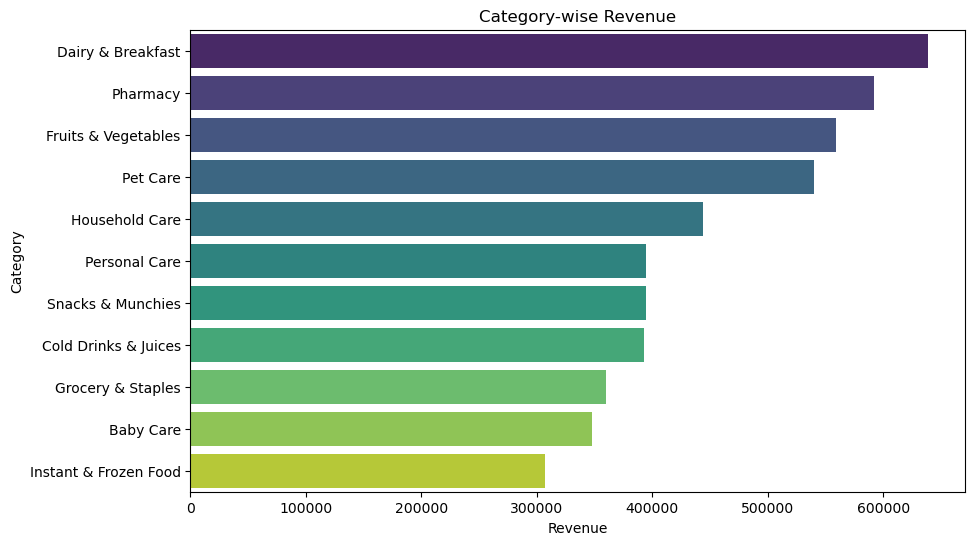

In [25]:
category_revenue = rsql('''
SELECT p.category, SUM(oi.quantity * oi.unit_price) AS total_revenue
FROM Order_Items oi
JOIN Products p ON oi.product_id = p.product_id
GROUP BY p.category
ORDER BY total_revenue DESC
''')
plt.figure(figsize=(10,6))
sns.barplot(x="total_revenue", y="category", data=category_revenue, palette="viridis")
plt.title("Category-wise Revenue")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()

 Top 10 Best-Selling Products (by revenue)ORDER BY damage_percentage DESC;

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19664\1484812355.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_revenue", y="product_name", data=top_products, palette="magma")


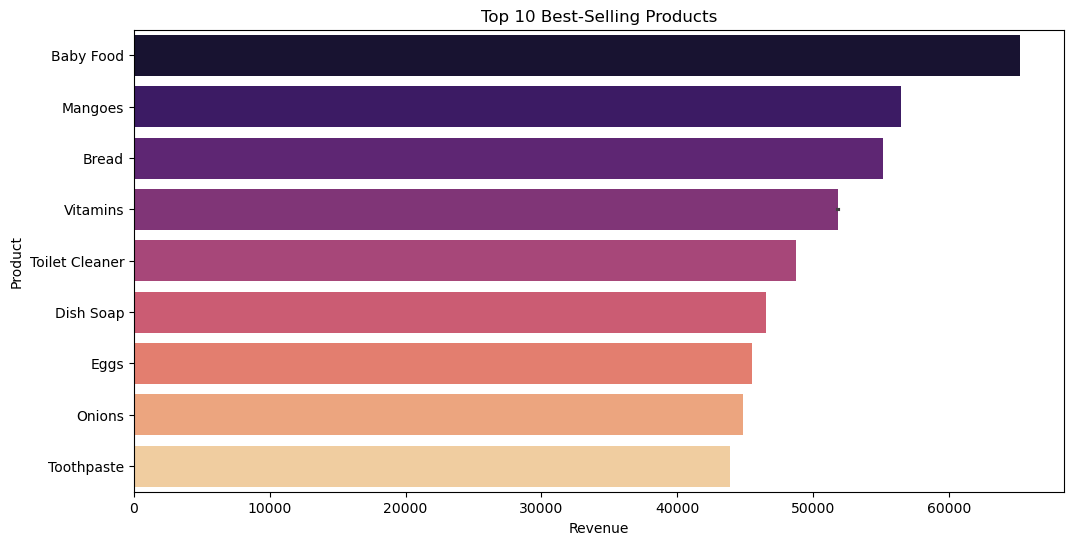

In [26]:
top_products = rsql('''
SELECT p.product_name, SUM(oi.quantity * oi.unit_price) AS total_revenue
FROM Order_Items oi
JOIN Products p ON oi.product_id = p.product_id
GROUP BY p.product_id
ORDER BY total_revenue DESC
LIMIT 10
''')
plt.figure(figsize=(12,6))
sns.barplot(x="total_revenue", y="product_name", data=top_products, palette="magma")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

Monthly Revenue Trend

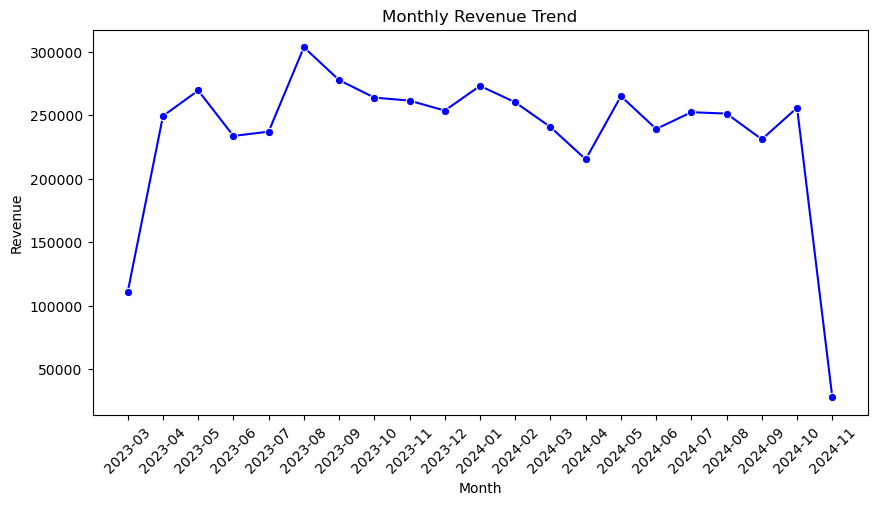

In [27]:
monthly_revenue = rsql('''
SELECT strftime('%Y-%m', order_date) AS month,
       SUM(oi.quantity * oi.unit_price) AS total_revenue
FROM Orders o
JOIN Order_Items oi ON o.order_id = oi.order_id
GROUP BY month
ORDER BY month
''')
plt.figure(figsize=(10,5))
sns.lineplot(x="month", y="total_revenue", data=monthly_revenue, marker="o", color="blue")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

 Payment Method Usage

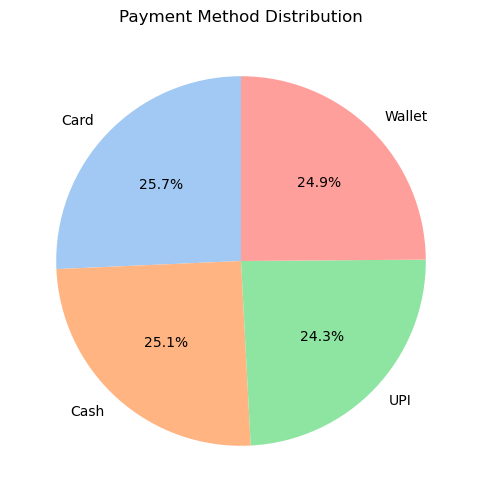

In [28]:
payment_methods = rsql('''
SELECT payment_method, COUNT(order_id) AS total_orders
FROM Orders
GROUP BY payment_method
''')
plt.figure(figsize=(6,6))
plt.pie(payment_methods['total_orders'], labels=payment_methods['payment_method'],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Method Distribution")
plt.show()

Store Performance (Top 10 by Revenue)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19664\1434586153.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sales", y="store_id", data=store_performance, palette="plasma")


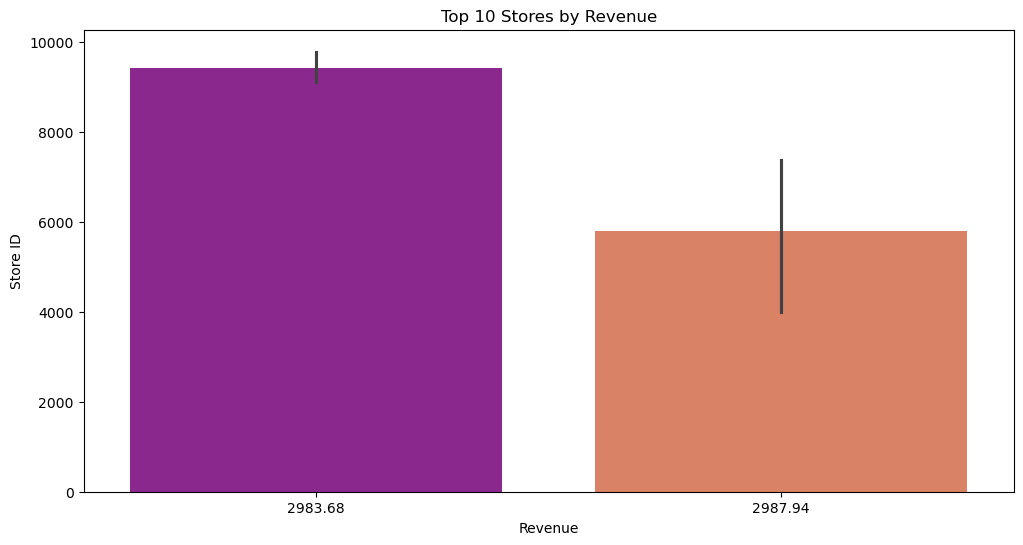

In [30]:

store_performance = rsql('''
SELECT o.store_id, SUM(oi.quantity * oi.unit_price) AS total_sales
FROM Orders o
JOIN Order_Items oi ON o.order_id = oi.order_id
GROUP BY o.store_id
ORDER BY total_sales DESC
LIMIT 10
''')
plt.figure(figsize=(12,6))
sns.barplot(x="total_sales", y="store_id", data=store_performance, palette="plasma")
plt.title("Top 10 Stores by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Store ID")
plt.show()

 Damaged Stock Percentage by Product (Top 10)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19664\2819662292.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="damage_percentage", y="product_name", data=damaged_stock, palette="rocket")


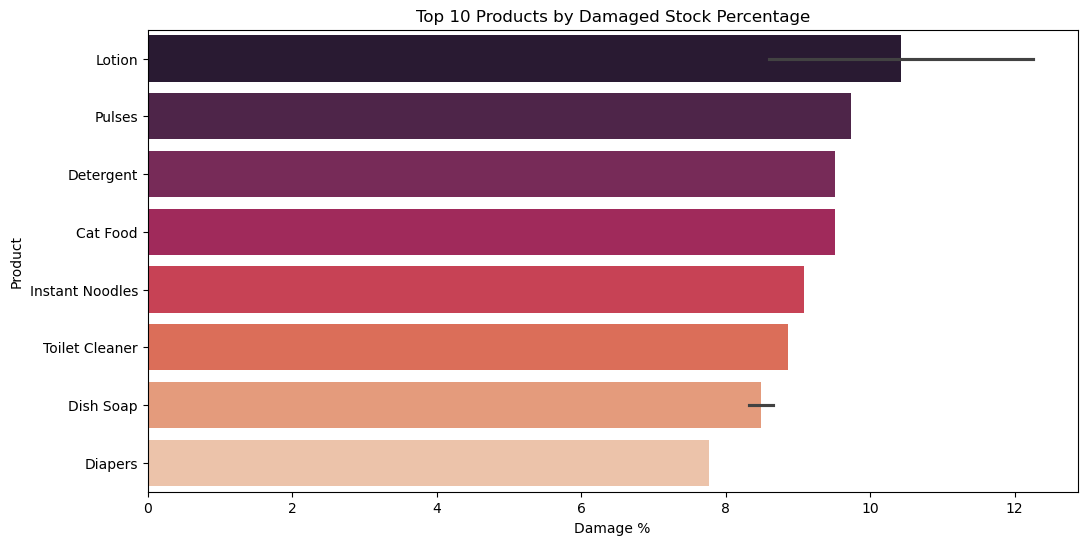

In [31]:
damaged_stock = rsql('''
SELECT p.product_name,
       SUM(i.damaged_stock) AS damaged_units,
       SUM(i.stock_received) AS total_units,
       ROUND((SUM(i.damaged_stock)*100.0)/SUM(i.stock_received), 2) AS damage_percentage
FROM Inventory i
JOIN Products p ON i.product_id = p.product_id
GROUP BY p.product_id
HAVING total_units > 0
ORDER BY damage_percentage DESC
LIMIT 10
''')
plt.figure(figsize=(12,6))
sns.barplot(x="damage_percentage", y="product_name", data=damaged_stock, palette="rocket")
plt.title("Top 10 Products by Damaged Stock Percentage")
plt.xlabel("Damage %")
plt.ylabel("Product")
plt.show()


Revenue Heatmap: Category vs Payment Method

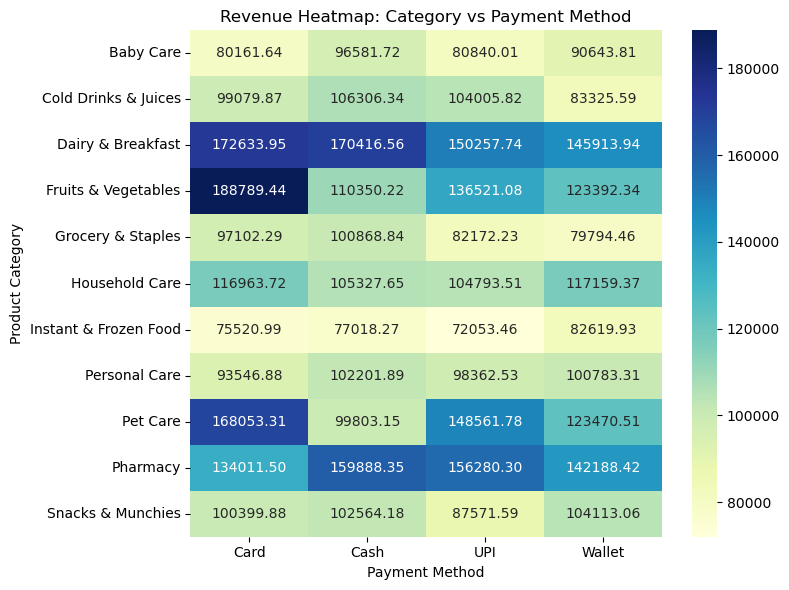

In [63]:
import seaborn as sns

query = """
SELECT p.category, 
       o.payment_method, 
       SUM(oi.quantity * oi.unit_price) AS total_revenue
FROM Orders o
JOIN Order_Items oi ON o.order_id = oi.order_id
JOIN Products p ON oi.product_id = p.product_id
GROUP BY p.category, o.payment_method
"""
df_heat = rsql(query)

# Pivot table for heatmap
pivot_table = df_heat.pivot(index='category', columns='payment_method', values='total_revenue')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Revenue Heatmap: Category vs Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()
